In [1]:
import json
from urllib.request import urlopen

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from highlight_text import fig_text

from mplsoccer import Bumpy, FontManager, add_image

## Font
Usiamo FontManager di mplsoccer per caricare font da Google Font

In [2]:
#font_normal = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                          #"roboto/Roboto%5Bwdth,wght%5D.ttf")
#font_bold = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                        #"robotoslab/RobotoSlab%5Bwght%5D.ttf")

import os
import matplotlib.font_manager as fm

font_path = "assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

## Caricare il dataset e il logo

In [3]:
logo = Image.open(
    urlopen("https://images.sports.gracenote.com/images/lib/basic/sport/football/competition/logo/300/53.png")
)

with open('data/bumpy_standings.json', 'r') as file:
    season_dict = json.load(file)

## Bumpy Chart
Un Bump Chart è una forma particolare di un line chart.
Questo grafico è adatto per esplorare i cambiamenti di classifica nel tempo.
Usando questo grafico, si può facilmente confrontare la posizione,
prestazioni o classifiche di più osservazioni l'uno con l'altro piuttosto che ai valori effettivi stessi.
Utilizzeremo i dati della classifica settimanale della Serie A 2022/23, senza considerare la penalizzazione
della Juventus, in modo da dare un andamento più realistico di quanto verificatosi nel corso della stagione.
Se avessimo applicato la penalizzazione (-10 punti), avrebbe falsato un po' tutto il conteggio, essendo stati
tolti e rimessi non solo in un'istanza per vicende giuridiche.


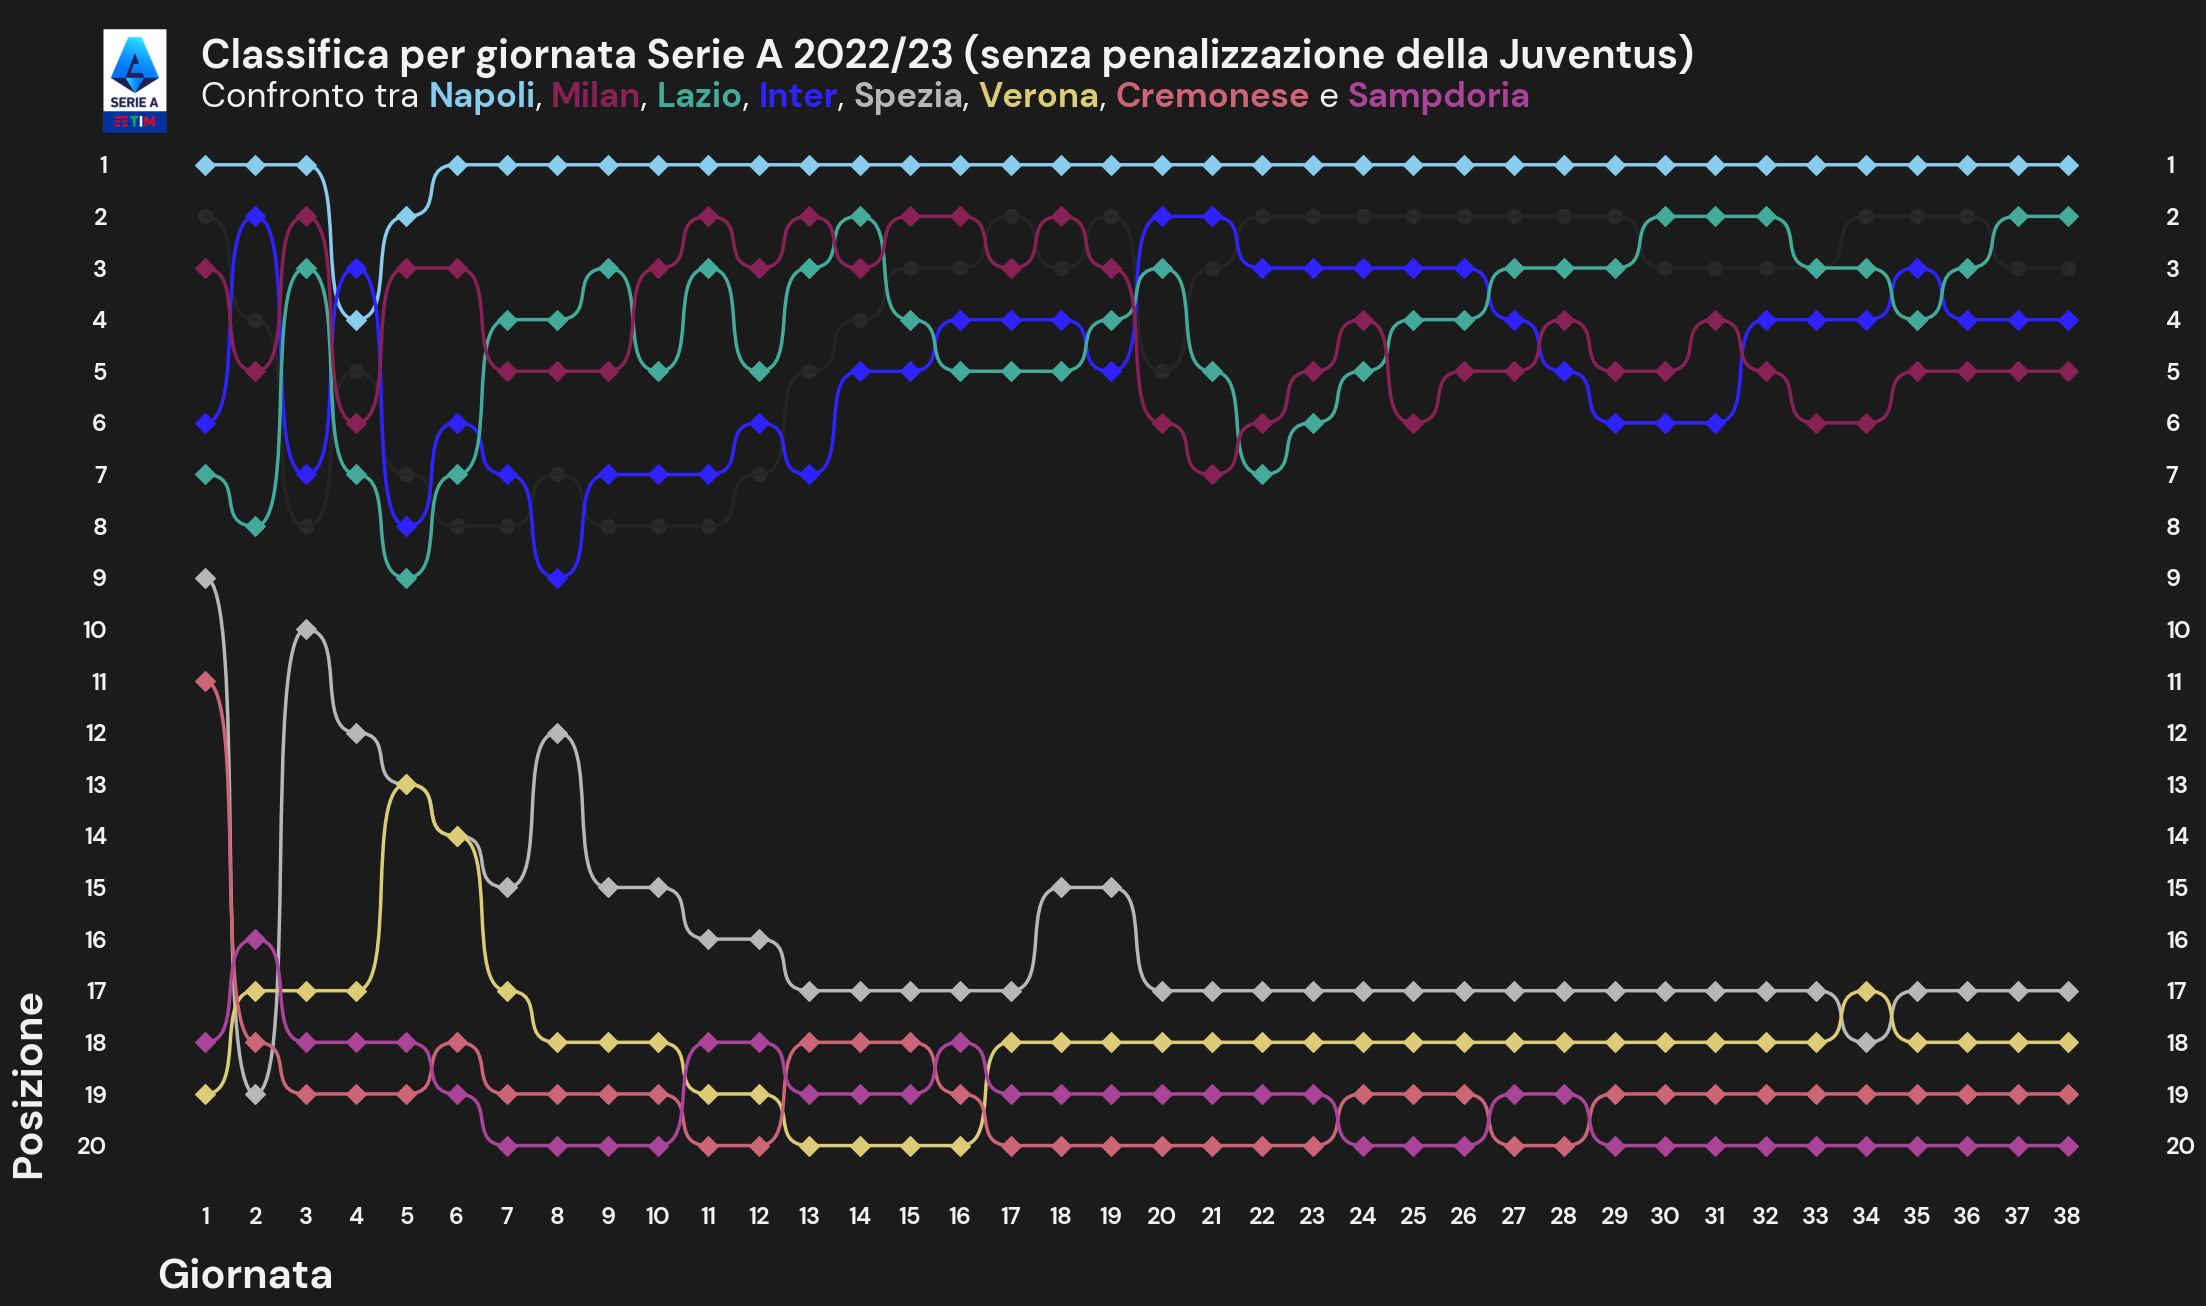

In [4]:
# match-week
match_day = [str(num) for num in range(1, 39)]

# highlight dict --> team to highlight and their corresponding colors
highlight_dict = {
    #"Juventus":
    "Napoli":       "#88CCEE",
    "Milan":        "#882255",
    "Lazio":        "#44AA99",
    "Inter":        "#2E23FF",
    "Spezia":       "#B7B7B7",
    "Verona":       "#DDCC77",
    "Cremonese":    "#CC6677",
    "Sampdoria":    "#AA4499"
}

# instantiate object
bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)

# plot bumpy chart
fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 20
    values=season_dict,  # values having positions for each team
    secondary_alpha=1,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(22, 13),  # size of the figure
    x_label='Giornata', y_label='Posizione',  # label name
    ylim=(-0.1, 23),  # y-axis limit
    lw=2.5,   # linewidth of the connecting lines
    fontname="DM Sans", weight = 'bold',   # fontproperties for ticklables/labels
)

# title and subtitle
title = "Classifica per giornata Serie A 2022/23 (senza penalizzazione della Juventus)"
sub_title = "Confronto tra <Napoli>, <Milan>, <Lazio>, <Inter>, <Spezia>, <Verona>, <Cremonese> e <Sampdoria>"

# add title
fig.text(0.09, 0.95, title, size=29, color="#F2F2F2", fontname="DM Sans", weight = 'bold')

'''
        highlight_textprops=[
            #{"color": "#000000"},
            {"color": "#0072B2"},
            {"color": "#CC79A7"},
            {"color": "#56B4E9"},
            {"color": "#F0E442"},
            {"color": "#E69F00"},
            {"color": "#D55E00"},
            {"color": "#009E73"}
            ],
'''

# add subtitle
fig_text(
    0.09, 0.94, sub_title, color="#F2F2F2",
    highlight_textprops=[
        {"color": "#88CCEE", "weight": "bold"},
        {"color": "#882255", "weight": "bold"},
        {"color": "#44AA99", "weight": "bold"},
        {"color": "#2E23FF", "weight": "bold"},
        {"color": "#B7B7B7", "weight": "bold"},
        {"color": "#DDCC77", "weight": "bold"},
        {"color": "#CC6677", "weight": "bold"},
        {"color": "#AA4499", "weight": "bold"}
    ],
    size=25, fig=fig, fontname="DM Sans"
)


# add image
fig = add_image(
     logo,
     fig,  # figure
     0.02, 0.9,  # left and bottom dimensions
     0.08, 0.08  # height and width values
)

# if space is left in the plot use this
plt.tight_layout(pad=0.5)

plt.savefig(
	"figures/SerieA_Weekly_Standings.png",
	dpi = 600,
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)